# **Modelling and Evaluation**

## **1. Introduction**

## Objectives

- **Answer business requirement 2**
    - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

- inputs/datasets/cherry-leaves/train
- inputs/datasets/cherry-leaves/validation
- inputs/datasets/cherry-leaves/test
- image_shape.pkl file
  
## Outputs

- Plot illustrating how images are distributed within the training, validation, and test sets.
- Image augmentation.
- Mapping class indices to labels for human-readable predictions.
- Creating and training a TensorFlow-based machine learning model.
- Save model.
- Graph displaying the learning curve for the model's performance.
- Model evaluation on pickle file.
- Making predictions on a randomly selected leaf image file.


---

## **2. Import packages**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## **3. Setup**

### Working Directory

We need to change the working directory to the projects main directory
* We access the current directory with os.getcwd()

In [2]:
cwd = os.getcwd()
print(f"\x1b[32mCurrent directory - {cwd}\x1b[0m")

Current directory - /workspaces/Portfolio-Project-5/jupyter_notebooks


In [3]:
os.chdir('/workspaces/Portfolio-Project-5')
print("\x1b[32mYou set a new current directory\x1b[0m")

You set a new current directory


In [4]:
work_dir = os.getcwd()
print(f"\x1b[32mCurrent directory - {cwd}\x1b[0m")

Current directory - /workspaces/Portfolio-Project-5/jupyter_notebooks


---

### Input Directories
- Setting the input directories 

In [5]:
my_data_dir = 'inputs/datasets/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

### Output Directories

- Setting the output directories

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


---

### Labels

- This cell will get the labels for the train dataset

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['powdery_mildew', 'healthy']


---

### Image Shape

- Import saved image shape embedding

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(50, 50, 3)

---

## **4. Number Of Images**

- This function is designed to determine the quantity of images within each label category for the training, validation, and testing datasets.
- We perform this action to determine if there is an even distribution of data among the labels within the datasets.

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




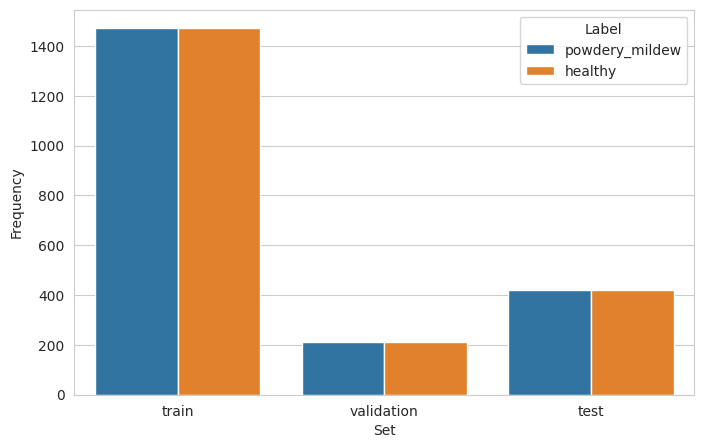

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## **5. Data Augmentation**

### Setup

- Importing package and setting up ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Settings for train dataset

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

---

### Performing Data Augmentation

- Training
    - In the training set, we are applying various data augmentation techniques to generate additional training examples. These techniques include rotation, width shift, height shift, shear, zoom, horizontal flipping, and vertical flipping.
    - We are also setting the batch size in this cell

In [12]:
batch_size = 15
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Validation
    - The primary reason for not augmenting the validation and test sets is to ensure that the model's evaluation is based on the model's performance on data it has not seen during training.

In [13]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Test
    - The primary reason for not augmenting the validation and test sets is to ensure that the model's evaluation is based on the model's performance on data it has not seen during training.

In [14]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

---

### Plot Augmented Dataset

- Training

(15, 50, 50, 3)


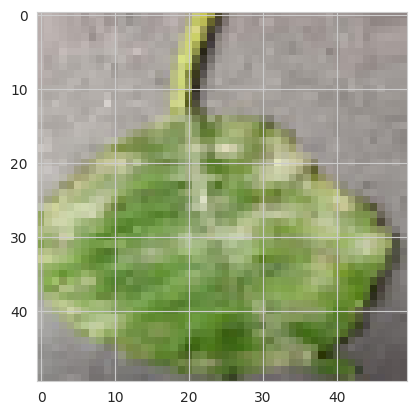

(15, 50, 50, 3)


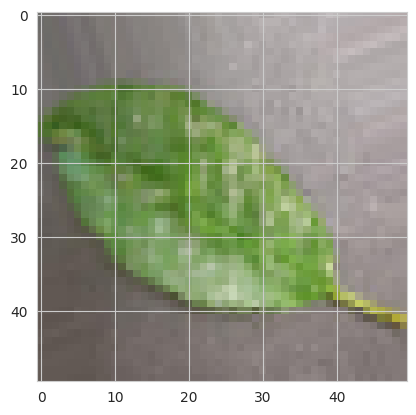

(15, 50, 50, 3)


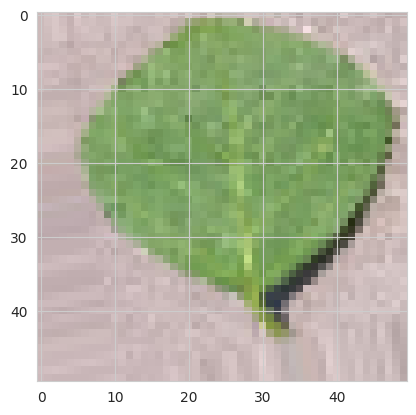

In [15]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- Validation

(15, 50, 50, 3)


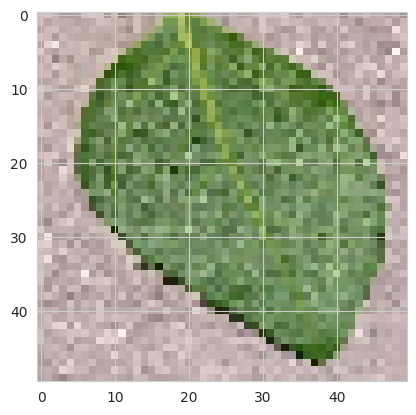

(15, 50, 50, 3)


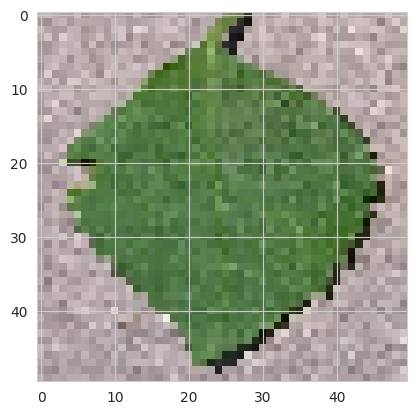

(15, 50, 50, 3)


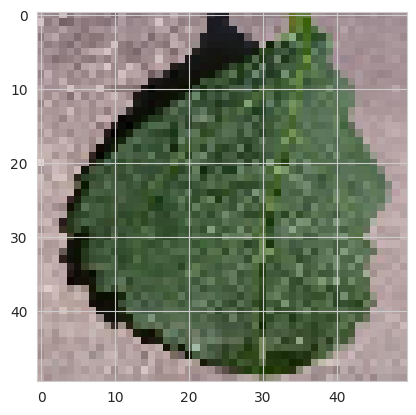

In [16]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

- Test

(15, 50, 50, 3)


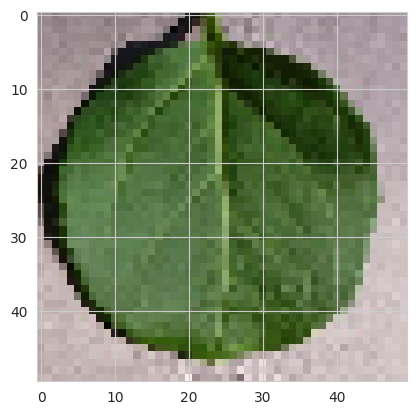

(15, 50, 50, 3)


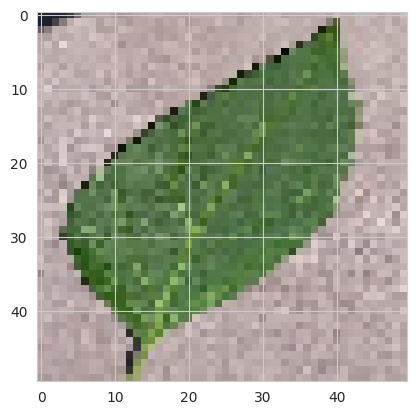

(15, 50, 50, 3)


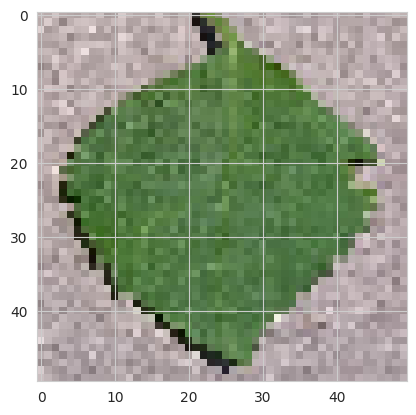

In [17]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

---

### Save class_indices

- This cell will save the indices for the labels to class_indices.pkl and print out the stored index value for each label

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

class_indices = joblib.load(f"{file_path}/class_indices.pkl")
print(class_indices)

{'healthy': 0, 'powdery_mildew': 1}


---

## **6. Model Creation**

### TensorFlow

- Importing TensorFlow

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model

- Create the model

In [20]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

- Model summary

In [21]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

- Early stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

- Fit the Model for training

In [23]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

2023-10-22 14:39:41.205628: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
196/196 [==============================] - 39s 80ms/step - loss: 0.4218 - accuracy: 0.7791 - val_loss: 0.1633 - val_accuracy: 0.9405
Epoch 2/25
196/196 [==============================] - 15s 77ms/step - loss: 0.2061 - accuracy: 0.9235 - val_loss: 0.0599 - val_accuracy: 0.9762
Epoch 3/25
196/196 [==============================] - 15s 77ms/step - loss: 0.1243 - accuracy: 0.9566 - val_loss: 0.0453 - val_accuracy: 0.9905
Epoch 4/25
196/196 [==============================] - 20s 100ms/step - loss: 0.0662 - accuracy: 0.9833 - val_loss: 0.0457 - val_accuracy: 0.9881
Epoch 6/25
196/196 [==============================] - 16s 83ms/step - loss: 0.0438 - accuracy: 0.9846 - val_loss: 0.0110 - val_accuracy: 0.9976
Epoch 7/25
196/196 [==============================] - 16s 79ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0402 - val_accuracy: 0.9857
Epoch 8/25
196/196 [==============================] - 15s 78ms/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.0032 - val_accuracy

- Save the model

In [24]:
model.save('outputs/v1/cherry_leaves_model.h5')

## **7. Model Performace**

### Model learning curve

- This function will create plots of the models performance, the blue line is for training data and the orange is for validation data

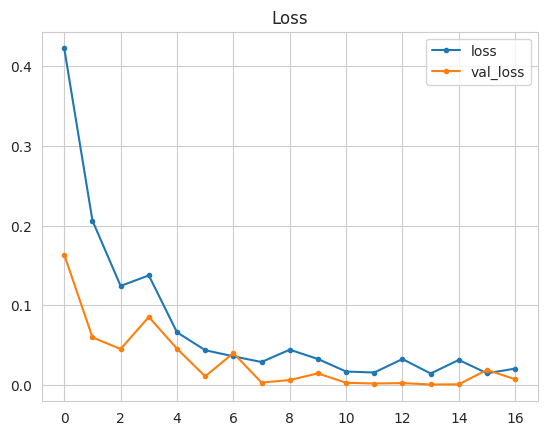

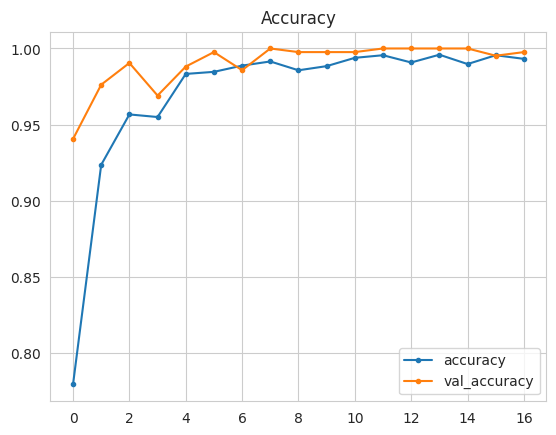

In [25]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)

plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)

plt.show()

---

### Model Evaluation

- We start by loading our model

In [26]:
from keras.models import load_model
model = load_model('outputs/v1/cherry_leaves_model.h5')

- Then we evaluate the model on the test set

In [38]:
evaluation = model.evaluate(test_set)

57/57 [==============================] - 1s 24ms/step - loss: 0.0081 - accuracy: 0.9964


- And last we store it to a pickle file

In [39]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

### Predict With Unseen Data

- We will load a random picture from the test set

Image shape: (50, 50), Image mode: RGB


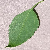

In [29]:
from tensorflow.keras.preprocessing import image

pointer = 83
label = labels[1]  # select Uninfected or Parasitised

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


- Transform it into an array

In [30]:
prediction_test_image = image.img_to_array(pil_image)
prediction_test_image = np.expand_dims(prediction_test_image, axis=0)/255
print(prediction_test_image.shape)

(1, 50, 50, 3)


- Finally, we will predict the picture's class and display its associated probability.

In [31]:
pred_proba = model.predict(prediction_test_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9999995845338958
healthy


## **8. Push to Github Repository**

In [40]:
!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json
inputs/datasets/cherry-leaves/train
inputs/datasets/cherry-leaves/test

In [41]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    inputs/datasets/cherry-leaves/test/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG
	deleted:    inputs/datasets/cherry-leaves/test/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_flipTB.JPG
	deleted:    inputs/datasets/cherry-leaves/test/healthy/014161fb-3c15-414b-9af3-00cb51a11d7c___JR_HL 9842.JPG
	deleted:    inputs/datasets/cherry-leaves/test/healthy/04585023-ef52-4b9d-9763-50318773c5d7___JR_HL 9791_180deg.JPG
	deleted:    inputs/datasets/cherry-leaves/test/healthy/048daa26-d38c-477a-96b8-018b3d4ba386___JR_HL 9767_180deg.JPG
	deleted:    inputs/datasets/cherry-leaves/test/healthy/069996a8-8cdb-4837-a5fe-c5a957b5677a___JR_HL 3938_flipTB.JPG
	deleted:    inputs/datasets/cherry-leaves/test/healthy/07e3276c-7e86-48ee-96d0-db2

In [34]:
!git add .

In [35]:
!git commit -am "Add new model with the path 'outputs/v1/cherry_leaves_model.h5'"

In [36]:
!git push

## **9 .Conclusions and Next Steps**

### Summary 

- In this notebook, we successfully trained a TensorFlow Convolutional Neural Network (CNN) model to effectively distinguish between sick and healthy cherry leaves.

- Our model demonstrated remarkable performance, reaching an accuracy of 99% on the test set. This level of accuracy exceeds our initial expectations and fulfills the primary objective of the project.

### Key finding

- The training of the model was conducted with various batch sizes, and it became evident that a batch size of 15 yielded the highest accuracy on the **test_set**.
    - bach_size of 10 - 2s 17ms/step - loss: 0.0276 - accuracy: 0.9953
    - **bach_size of 15 - 1s 24ms/step - loss: 0.0081 - accuracy: 0.9964**
    - bach_size of 20 - 2s 28ms/step - loss: 0.0451 - accuracy: 0.9882
    - bach_size of 25 - 2s 40ms/step - loss: 0.0123 - accuracy: 0.9953

In conclusion, our experimentation clearly demonstrates that the choice of batch size can significantly impact both training time and final model accuracy. For our specific problem of cherry leaf classification, a batch size of 15 proves to be the optimal choice, achieving exceptional accuracy. This showcases the importance of hyperparameter tuning to achieve the best model performance for a specific task

### Next

- The next phase of our project involves integrating this trained model into a Streamlit dashboard, where it can be utilized by stakeholders. This interactive interface will provide a platform for real-time leaf disease classification.